# Testing pre-learned neural network with real-time capturing camera

In this test I'll be connecting my convolution neural network with camera and trying to observ whether it can recognize dices correctly.

I'm using opencv to resize and crop camera screen, because I'm mostly interested in results and speed rather than very precise photos recognition. Also as my network is pre-learned on very tiny photos it will prevent error that might occur by changing the size of camera input


In [1]:
%matplotlib inline
%pylab inline 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from keras.models import load_model
from keras.utils import to_categorical

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.
/home/oziomek/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
model = load_model('../learnNN/NNLearning/dices_cnn/model2rms_continue-08-0.1021.h5')

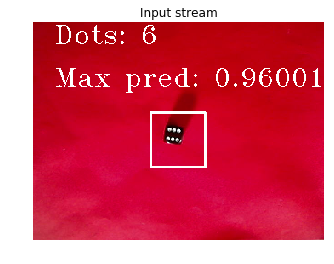

In [34]:
cap = cv2.VideoCapture(1)
factor = 0.534
try:
    while True:
        capturing, frame = cap.read()
        if not capturing:
            cap.release()
            break
        frame = cv2.resize(frame, None, fx=factor, fy=factor, interpolation=cv2.INTER_CUBIC)
        second_frame = frame.copy()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        y = int(200 * factor)
        x = int(260 * factor)
        size = int(120 * factor)
        cropped_frame = frame[y:y+size, x:x+size]
        cv2.rectangle(second_frame, (x, y), (x+size, y+size), (255, 255, 255), 2)
        frame_for_network = cropped_frame.reshape(1, 1, 64, 64).astype('float32')
        frame_for_network /= 255
        prediction = model.predict(frame_for_network)
#         prediction = to_categorical(prediction, 6)
#         print(prediction)
#         print(np.argmax(prediction) + 1)
        axis('off')
        title('Input stream')
        prediction_text = 'Dots: %d' % (np.argmax(prediction)+1)
        prediction_text2 = 'Max pred: %f' % (np.amax(prediction))
        second_frame = cv2.cvtColor(second_frame, cv2.COLOR_BGR2RGB)
        cv2.putText(second_frame, prediction_text, (25, 25), cv2.FONT_HERSHEY_TRIPLEX, 1, (255, 255, 255), 1, 8)
        cv2.putText(second_frame, prediction_text2, (25, 75), cv2.FONT_HERSHEY_TRIPLEX, 1, (255, 255, 255), 1, 8)
        imshow(second_frame)
        show()
        display.clear_output(wait=True)
except KeyboardInterrupt:
    cap.release()